In [2]:
import sys
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src.solvers import *
from src.syntetic import *
from src.file_readers import * 
from exp.experiment_helpers.metrics import * 
from exp.experiment_helpers.model_evaluation import * 
from exp.experiment_helpers.file_handlers import * 


In [3]:
process_directory('data',  'ex02_results.csv')

In [8]:
df = pd.read_csv('ex02_results.csv')

In [76]:

constant_M = 689
constant_K1 = 6
constant_K2 = 7

filtered_M = df[(df['K1'] == constant_K1) & (df['K2'] == constant_K2)]
filtered_K1 = df[(df['M'] == constant_M)]


def plot_with_error_bars(df, x_var, y_var1, y_var2, xlabel, x_scale = 'linear'):
    grouped = df.groupby(x_var).agg(
        y1_mean=(y_var1, 'mean'),
        y1_std=(y_var1, 'std'),
        y2_mean=(y_var2, 'mean'),
        y2_std=(y_var2, 'std')
    ).reset_index()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    # plot error bars
    axes[0].errorbar(grouped[x_var], grouped['y1_mean'], yerr=grouped['y1_std'], label=y_var1, fmt='-o', alpha=0.7, capsize=3)
    axes[0].errorbar(grouped[x_var], grouped['y2_mean'], yerr=grouped['y2_std'], label=y_var2, fmt='-o', alpha=0.7, capsize=3)
    axes[0].axhline(y=1, color='grey', linestyle='--', linewidth=1)
    axes[0].set_xlabel(xlabel)
    axes[0].set_xscale('log') if x_scale == 'log' else axes[0].set_xscale('linear')
    axes[0].set_ylabel('Likelihood')
    axes[0].set_title(f'Likelihood vs {xlabel} with Other Variables Constant')
    axes[0].legend()
    
    # plot absolute value from 1
    axes[1].plot(grouped[x_var], abs(grouped['y1_mean'] - 1), label=f'{y_var1} - 1', alpha=0.7)
    axes[1].plot(grouped[x_var], abs(grouped['y2_mean'] - 1), label=f'{y_var2} - 1', alpha=0.7)
    axes[1].axhline(y=0, color='grey', linestyle='--', linewidth=1)
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel('Distance from 1')
    axes[1].set_title(f'Distance from y=1 vs {xlabel} with Other Variables Constant')
    axes[1].legend()



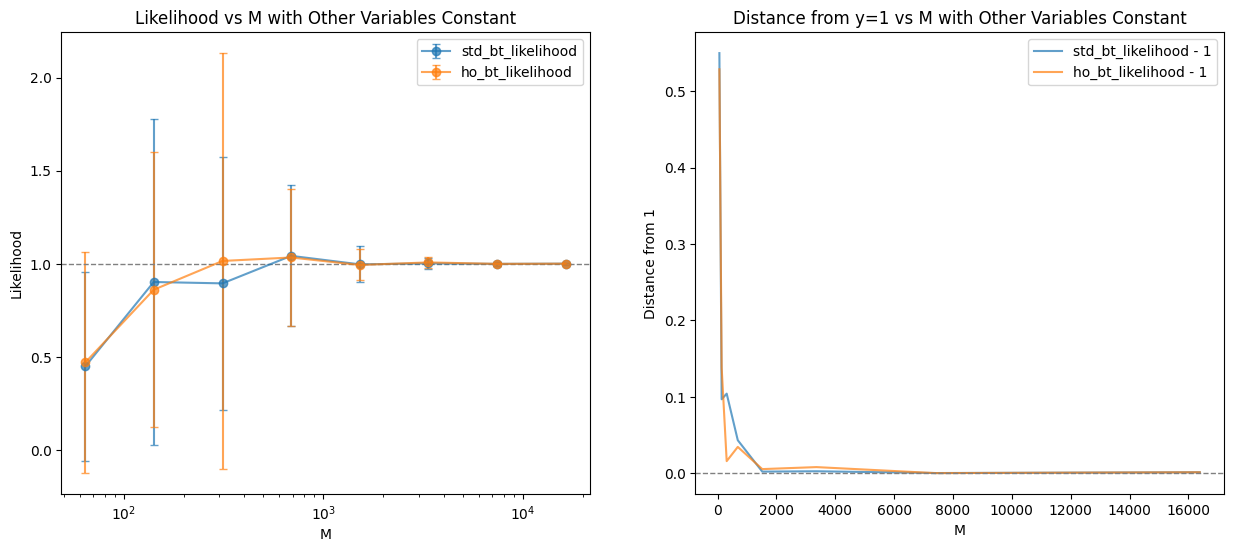

In [77]:
plot_with_error_bars(filtered_M, 'M', 'std_bt_likelihood', 'ho_bt_likelihood', 'M', 'log')

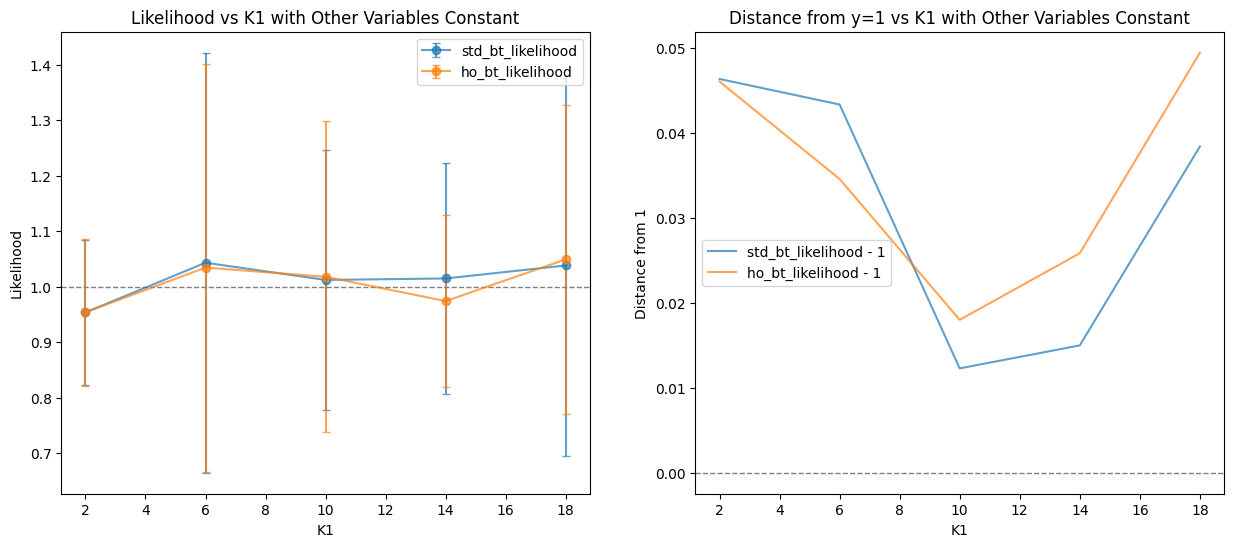

In [78]:
plot_with_error_bars(filtered_K1, 'K1', 'std_bt_likelihood', 'ho_bt_likelihood', 'K1')

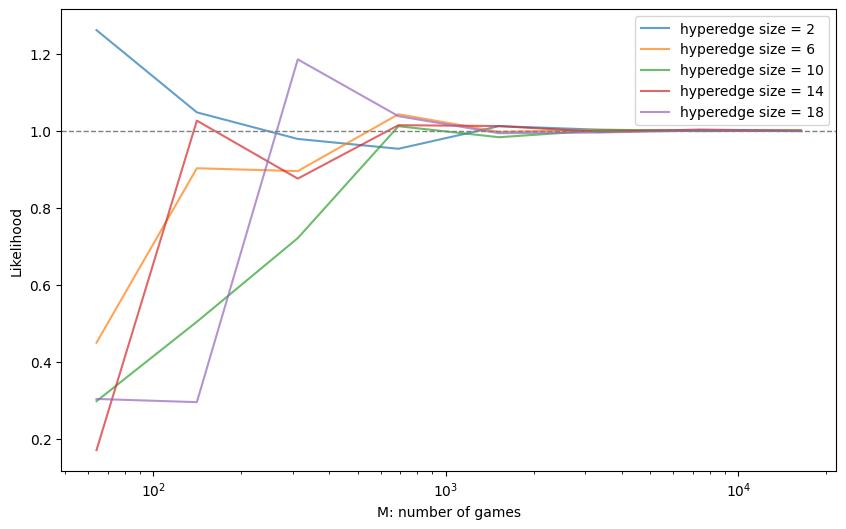

In [83]:

unique_constants = df['K1'].unique()

plt.figure(figsize=(10, 6))

for hyperedge_size in unique_constants:
    filtered_df = df[(df['K1'] == hyperedge_size)]


    grouped = filtered_df.groupby(['N','M']).agg(
        std_mean=('std_bt_likelihood', 'mean'),
    ).reset_index()


    
    plt.plot(grouped['M'], grouped['std_mean'], label=f'hyperedge size = {hyperedge_size}', alpha=0.7)
   

plt.axhline(y=1, color='grey', linestyle='--', linewidth=1)
plt.xscale('log')
plt.xlabel('M: number of games')
plt.ylabel('Likelihood')
plt.legend()
plt.show()
